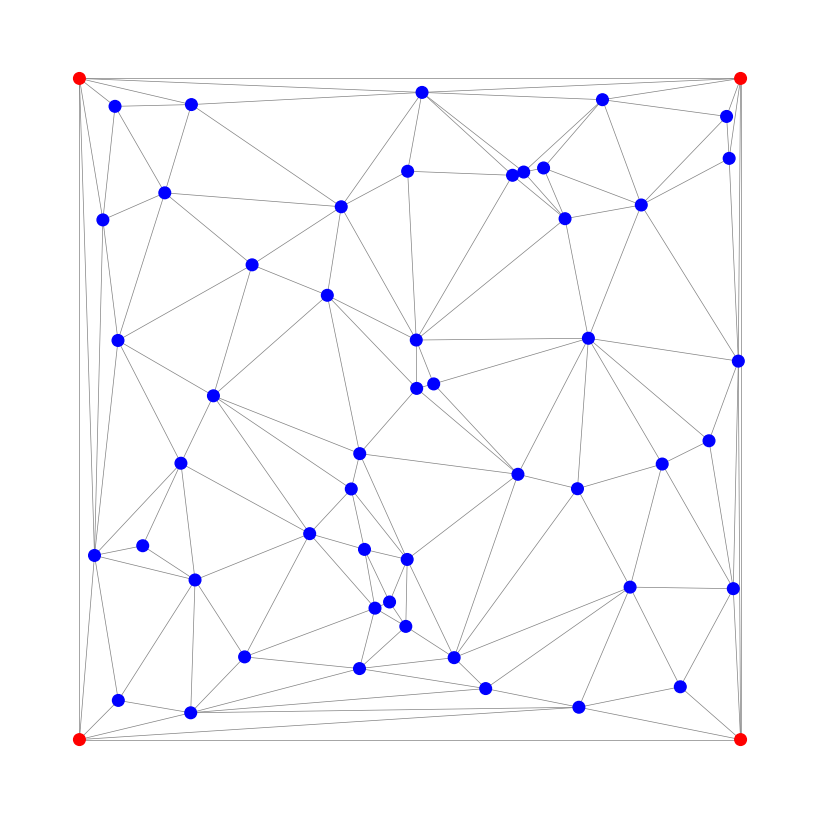

In [10]:
import numpy as np
from scipy.spatial import Delaunay
import networkx as nx
import matplotlib.pyplot as plt

# 1. N個のランダムな点を生成 (例: 50個)
num_random_points = 50
random_points = np.random.rand(num_random_points, 2)

# 固定する点
fixed_points = np.array(
    [
        [0.0, 0.0],
        [1.0, 1.0],
        [1.0, 0.0],
        [0.0, 1.0],
    ]
)

# 全ての点を結合
points = np.vstack([fixed_points, random_points])
N = points.shape[0]  # 全ノード数

# 固定点のインデックスを特定
# (0,0)がインデックス0、(1,1)がインデックス1になることを前提とする
fixed_node_indices = [0, 1, 2, 3]

# 2. ドロネー三角形分割を実行
tri = Delaunay(points)

# 3. グラフ（辺のリスト）を作成
# 4. NetworkXグラフオブジェクトの作成
G = nx.Graph()
G.add_nodes_from(range(N))
for simplex in tri.simplices:
    # 三角形の各辺 (i,j), (j,k), (k,i) をグラフに追加
    G.add_edge(
        simplex[0],
        simplex[1],
        distance=np.linalg.norm(points[simplex[0]] - points[simplex[1]]),
    )
    G.add_edge(
        simplex[1],
        simplex[2],
        distance=np.linalg.norm(points[simplex[1]] - points[simplex[2]]),
    )
    G.add_edge(
        simplex[2],
        simplex[0],
        distance=np.linalg.norm(points[simplex[2]] - points[simplex[0]]),
    )

# 5. 描画して確認
plt.figure(figsize=(8, 8))

# ノードの位置を設定
pos = {i: points[i] for i in range(N)}

# ノードの色を設定
node_colors = ["blue"] * N  # デフォルトは青
for idx in fixed_node_indices:
    node_colors[idx] = "red"  # 固定点は赤

# グラフの描画
nx.draw(
    G,
    pos,
    with_labels=False,  # ノード番号を表示しない
    node_size=70,  # ノードのサイズ
    node_color=node_colors,  # ノードの色
    width=0.5,  # 辺の太さ
    edge_color="gray",  # 辺の色
)
plt.gca().set_aspect("equal", adjustable="box")  # アスペクト比を1:1に
plt.show()

In [11]:
def draw_graph_with_shortest_path(G, pos, fixed_node_indices, path_color="green"):
    """
    グラフと、指定された2点間の最短経路をハイライトして描画する関数。

    Args:
        G (nx.Graph): 描画するNetworkXグラフ
        pos (dict): ノードの位置 {node_index: (x, y)}
        fixed_node_indices (list): [source_node, target_node] のインデックス
        path_color (str): 最短経路の辺の色
    """

    # 1. 最短経路の計算
    source_node = fixed_node_indices[0]
    target_node = fixed_node_indices[1]

    # nx.shortest_pathはノードのリストを返す (例: [0, 5, 12, 1])
    path_nodes = nx.shortest_path(
        G, source=source_node, target=target_node, weight="distance"
    )

    # ノードのリストを辺のリストに変換 (例: [(0, 5), (5, 12), (12, 1)])
    path_edges = list(zip(path_nodes[:-1], path_nodes[1:]))

    # 2. 描画の準備
    plt.figure(figsize=(8, 8))

    # ノードの色を設定 (固定点は赤、他は青)
    node_colors = ["blue"] * G.number_of_nodes()
    for idx in fixed_node_indices:
        node_colors[idx] = "red"

    # 3. グラフの描画
    # 3a. 全てのノードを描画
    nx.draw_networkx_nodes(G, pos, node_size=70, node_color=node_colors)

    # 3b. 全ての辺をデフォルト色（灰色）で描画
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color="gray", alpha=0.7)

    # 3c. 最短経路の辺をハイライト色で上書き描画
    nx.draw_networkx_edges(
        G,
        pos,
        edgelist=path_edges,  # 経路上の辺だけを指定
        width=2.5,  # 太くする
        edge_color=path_color,  # 指定された色
        alpha=1.0,
    )

    plt.xlim(-0.1, 1.1)
    plt.ylim(-0.1, 1.1)
    plt.gca().set_aspect("equal", adjustable="box")
    plt.show()

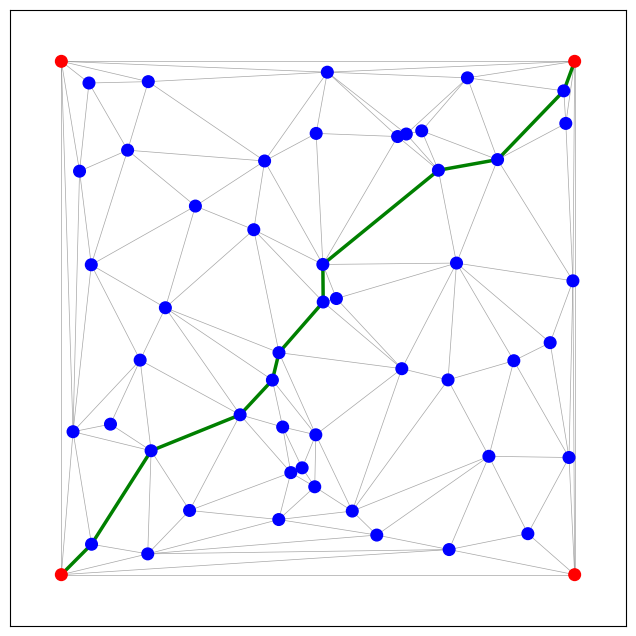

In [12]:
draw_graph_with_shortest_path(G, pos, fixed_node_indices, path_color="green")